<a id = 'BacktoTop'></a>
# Table Of Contents

0. [Libraries](#Libraries)

1. [Data](#Data)
    
    1.1 [Exploratory Data Analysis](#EDA)
    
    1.2 [Data Preprocessing](#DataPreprocessing)
    
    1.3 [Exploratory Data Analysis: Mean Imputation](#EDAimp) 

2. [Models](#SVM)

   2.1 [Support Vector Machines](#SVM)

    2.2 [Naive Bayes](#Bayes)

    2.3 [Decision Trees](#DecisionTrees) 

    2.4 [Ensemble Learning](#Ensemble)
    
    2.4.1 [Bagging](#Bagging)
    
    2.4.2 [AdaBoost](#Ada)
        
    2.4.3 [RandomForest](#RandomForest)

    2.5 [K-Nearest Neighbors](#KNN) 

    2.6 [Logistic Regression](#Logistic) 


# Slide Deck:
https://docs.google.com/presentation/d/1IexjcnS-nfs9ZOqNkQWWXFCH1fYqCg__dUpoVaw0EEQ/edit?usp=sharing



[Back to Top](#BacktoTop)
<a id = 'Libraries'></a>


# Libraries

In [ ]:
# Standard libraries
import pandas as pd
import numpy as np

# Data Visualization
import altair as alt
import matplotlib.pyplot as plt

# Data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

# Prediction models
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier

# Performance and Hypertuning
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.model_selection import GridSearchCV

# Set the randomizer seed so results are the same each time.
np.random.seed(10)

[Back to Top](#TableofContents)

<a id = 'Data'></a>
# Data


## General Notes


- raw kaggle data set 400 obs over 25 features and classification variable
- Just over 1000 null values across 25 features (wc and rc have the most)
- loading the data in has some character issues with some extra tab characters, need to be removed through preprocessing
- also some types not correct on load need to be fixed in preprocessing



## Variables (pulled from documentation)


**Numerical**
- age (years)
- bp (blood pressure mm/Hg)
- bgr (blood glucose random mgs/dl)
- bu (blood urea mgs/dl)
- sc (serum creatinine mgs/dl)
- sod (sodium mEq/L)
- pot (potassium mEq/L)
- hemo (Hemoblogin gms)
- pcv (Packed Cell Volume)
- wc (white blood cell count cells/cumm)
- rc (red blood cell cound millions/cmm)

**Ordinal**
- appet (Appetite: Good/Poor)
- sg (Specific Gravity)(1.005,1.010,1.015,1.020,1.025) **Already numerically coded**
- al (Albumin: 0,1,2,3,4,5) **Already numerically coded**
- su (sugar: 0,1,2,3,4,5) **Already numerically coded**

**Nominal**
- pc (Pus Cell: present, not present)
- rbc (Red Blood Cells: normal,abnormal)

**Binary**
- htn (Hypertension Y/N)
- dm (Diabetes Mellitus Y/N)
- cad (Coronary Artery Disease Y/N)
- pe (Pedal Edema Y/N)
- ane (Anemia Y/N)
- pcc (Plus Cell clumps: present/notpresent)
- ba (Bacteria: present/notpresent)

[Back to Top](#BacktoTop)
<a id = 'DataPreprocessing'></a>
# Data 


<a id = 'EDA'></a>
## Exploratory Data Analysis: Raw Data

Notes:
 - At least two columns load in with tab characters on read which causes issues with enumerating labels and binarization
 - `rc`,`wc`,`pcv` typed as object but are numeric need to be typed as float
 - `classification` is the only column with no missing values
 - top three features for missing values
  - `rbc` (red blood cells): 152
  - `rc` (red blood cell count): 130
  - `wc` (white blood cell count): 105
  

In [ ]:
# Load data
data = pd.read_csv('kidney_disease.csv',skipinitialspace = True)
# Fix issue with extra tab characters in columns on load
data = data.replace(r'\t','',regex=True)

In [ ]:
data=pd.read_csv('kidney_disease.csv',skipinitialspace = True)
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
data[['pcv','wc','rc']]

,pcv,wc,rc
0,44,7800,5.2
1,38,6000,NaN
2,31,7500,NaN
3,32,6700,3.9
4,35,7300,4.6
...,...,...,...
395,47,6700,4.9
396,54,7800,6.2
397,49,6600,5.4
398,51,7200,5.9


In [ ]:
data.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

3 numeric columns are loading as objects and need to be converted during preprocessing

In [ ]:
# Extra tab issues in classification and dm? at least
labels = data.classification.unique()
labels

array(['ckd', 'notckd'], dtype=object)

In [ ]:
# Fix issue with extra tab characters in columns on load
data = data.replace(r'\t','',regex=True)
# Fix numeric columns stored as objects
for x in ['rc','wc','pcv']:
  data[x] = data[x].str.extract('(\d+)').astype(float)

In [ ]:
# Count missing values by variable
data.isna().sum(axis=0).sort_values()

id                  0
classification      0
pe                  1
appet               1
ane                 1
cad                 2
dm                  2
htn                 2
pcc                 4
ba                  4
age                 9
bp                 12
sc                 17
bu                 19
bgr                44
al                 46
sg                 47
su                 49
hemo               52
pc                 65
pcv                71
sod                87
pot                88
wc                106
rc                131
rbc               152
dtype: int64

In [ ]:
# Proportion of values missing by variable
(data.isna().sum(axis=0)/data.shape[0]*100).sort_values()

id                 0.00
classification     0.00
pe                 0.25
appet              0.25
ane                0.25
cad                0.50
dm                 0.50
htn                0.50
pcc                1.00
ba                 1.00
age                2.25
bp                 3.00
sc                 4.25
bu                 4.75
bgr               11.00
al                11.50
sg                11.75
su                12.25
hemo              13.00
pc                16.25
pcv               17.75
sod               21.75
pot               22.00
wc                26.50
rc                32.75
rbc               38.00
dtype: float64

In [ ]:
labels = ['classification']
features = ['appet','pc', 'rbc','htn','dm','cad','pe','ane','pcc','ba', 'al', 'su','sg','age','bp','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']

X = data[features]
y = data[labels]

Blood Pressure EDA plots (unstandardized data)

In [ ]:
selection = alt.selection_multi(fields=['classification'], bind='legend')

base = alt.Chart(data).mark_point().encode(
    color = alt.Color('classification:N'),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2))
).add_selection(
    selection
)

upper = base.encode(
    x = alt.X('age:Q', axis=alt.Axis(title = 'Age')),
    y = alt.Y('bp:Q', axis=alt.Axis(title='Blood Pressure'))
    ) | base.encode(
        x = alt.X('pot:Q',axis=alt.Axis(title='Potassium')),
        y = alt.Y('bp:Q',axis=alt.Axis(title='Blood Pressure'))
        )
lower = base.encode(
      x = alt.X('sc:Q',axis=alt.Axis(title='Serum Creatinine')),
      y = alt.Y('bp:Q',axis=alt.Axis(title='Blood Pressure'))
      ) | base.encode(
        x = alt.X('bgr:Q',axis=alt.Axis(title='Blood Glucose Random')),
        y = alt.Y('bp:Q',axis=alt.Axis(title='Blood Pressure'))
        )

chart = alt.vconcat(upper,lower).configure_axis(
    grid=False
)
chart

alt.VConcatChart(...)

In [ ]:
# Quantitative Variables and Classification
cols1 = ['age','bp','bgr','bu','sc']
cols2 = ['sod','pot','hemo','pcv','wc','rc']

upper = alt.Chart(data).mark_bar().encode(
    alt.X(alt.repeat("column"), type='quantitative', scale=alt.Scale(zero=False)),
    y='count()',
    color = 'classification:N'
).properties(
    width=100,
    height=100,
).repeat(
    column=cols1
)

lower = alt.Chart(data).mark_bar().encode(
    alt.X(alt.repeat("column"), type='quantitative', scale=alt.Scale(zero=False)),
    y='count()',
    color = 'classification:N'
).properties(
    width=100,
    height=100,
).repeat(
    column=cols2
)
alt.vconcat(upper,lower)

alt.VConcatChart(...)

Interactive histograms for numeric features

In [ ]:
cols1 = ['age','bp','bgr','bu','sc']
cols2 = ['sod','pot','hemo','pcv','wc','rc']

#A dropdown filter
class_dropdown = alt.binding_select(options=['ckd','notckd'])
class_select = alt.selection_single(fields=['classification'], bind=class_dropdown, name="Class")

upper = alt.Chart(data).mark_bar().encode(
    alt.X(alt.repeat("column"), type='quantitative', scale=alt.Scale(zero=False)),
    y='count()',
    color = alt.value('orange')
).properties(
    width=100,
    height=100,
).repeat(
    column=cols1
).add_selection(
    class_select
).transform_filter(
    class_select
)

lower = alt.Chart(data).mark_bar().encode(
    alt.X(alt.repeat("column"), type='quantitative', scale=alt.Scale(zero=False)),
    y='count()',
    color = alt.value('orange')
).properties(
    width=100,
    height=100,
).repeat(
    column=cols2
).add_selection(
    class_select
).transform_filter(
    class_select
)

alt.vconcat(upper,lower)

alt.VConcatChart(...)

[Back to Top](#BacktoTop)
<a id = 'DataPreprocessing'></a>
## Data Preprocessing


- Remove extra tabs on load
- Correct typing error on ['rc','wc','pcv'] which get typed as object and should be numeric
- Binarize all non-numeric features 
  - All have only two categories and are reasonably represented as 0/1
  - Instead of enumerate coding in yes/no because not consistently set as 0/1 between features (potentially due to tab issue)
- Feature selection
  - Remove missing values from selected features
- Split features and labels into seperate numpy arrays

## Preprocessing Function 

In [ ]:
# data preprocessing function
def data_preprocessing(features = ['appet','pc', 'rbc','htn','dm','cad','pe',
                                   'ane','pcc','ba', 'al', 'su','sg','age','bp',
                                   'bgr','bu','sc','sod','pot','hemo','pcv',
                                   'wc','rc'], remove_NA = False, impute = False):
    '''
    Preprocesses kidney disease data set. Selects only the provided features. 

    Default behavior: Does not impute and does not remove missing values. 
    Selects all possible features.

    If impute == True then performs a mean imputation for missing values.

    All available features
    ['appet','pc', 'rbc','htn','dm','cad','pe','ane','pcc','ba',
    'al', 'su','sg','age','bp','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']
    '''
    # Load data
    df = pd.read_csv('kidney_disease.csv',skipinitialspace = True)

    # Fix issue with extra tab characters in columns on load
    df = df.replace(r'\t','',regex=True)
    # Fix numeric columns stored as objects
    for x in ['rc','wc','pcv']:
      df[x] = df[x].str.extract('(\d+)').astype(float)
    
    # Binarize Variables
    df[['htn','dm','cad','pe','ane']]=df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
    df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
    df[['pcc','ba']] = df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
    df[['appet']] = df[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})

    # Recode class labels (from 0 to 1)
    class_mapping = {'ckd':1,'notckd':0}
    print(class_mapping)
    df['class'] = df.classification.map(class_mapping) 
    
    print(df.head())
    labels = ['class']

    if impute == True:  
      # Imputation for missing data
      # Filling missing numeric data in the dataset with mean
      for i in ['age','bp','sg','al','su','bgr','bu','sc','sod','pot','hemo','rc','wc','pcv']:
          df[i].fillna(df[i].mean(),inplace=True)

    if remove_NA == True:
      # Remove missing values from selected features
      df = df[features+labels].dropna()
    
    #features
    X = np.array(df.iloc[:, :-2])
    #labels
    y = np.array(df.iloc[:, -1])

    # standardize features
    for x in features:
      df[x] = preprocessing.scale(df[x])
    X = preprocessing.scale(X)

    return df, X, y

<a id = 'EDAimp'></a>
## Exploratory Data Analysis: Mean Imputation

In [ ]:
imputed_data, X_std, y = data_preprocessing(impute=True)

{'ckd': 1, 'notckd': 0}
   id   age    bp     sg   al   su  ...  cad  appet   pe  ane  classification  class
0   0  48.0  80.0  1.020  1.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1
1   1   7.0  50.0  1.020  4.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1
2   2  62.0  80.0  1.010  2.0  3.0  ...  0.0    0.0  0.0  1.0             ckd      1
3   3  48.0  70.0  1.005  4.0  0.0  ...  0.0    0.0  1.0  1.0             ckd      1
4   4  51.0  80.0  1.010  2.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1

[5 rows x 27 columns]


In [ ]:
# Quantitative Variables and Classification
cols1 = ['age','bp','bgr','bu','sc']
cols2 = ['sod','pot','hemo','pcv','wc','rc']

upper = alt.Chart(imputed_data).mark_bar().encode(
    alt.X(alt.repeat("column"), type='quantitative', scale=alt.Scale(zero=False)),
    y='count()',
    color = 'classification:N'
).properties(
    width=100,
    height=100,
).repeat(
    column=cols1
)

lower = alt.Chart(imputed_data).mark_bar().encode(
    alt.X(alt.repeat("column"), type='quantitative', scale=alt.Scale(zero=False)),
    y='count()',
    color = 'classification:N'
).properties(
    width=100,
    height=100,
).repeat(
    column=cols2
)
alt.vconcat(upper,lower)

alt.VConcatChart(...)

In [ ]:
round(imputed_data.describe(),2)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
count,400.00,400.00,400.00,400.00,400.00,400.00,248.00,335.00,396.00,396.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,398.00,398.00,398.00,399.00,399.00,399.00,400.00
mean,199.50,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.62
std,115.61,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.48
min,0.00,-2.92,-1.97,-2.31,-0.80,-0.44,-0.48,-0.54,-0.34,-0.24,-1.69,-1.14,-0.48,-14.47,-0.76,-3.47,-3.67,-2.46,-2.52,-0.77,-0.72,-0.31,-1.97,-0.49,-0.42,0.00
25%,99.75,-0.56,-0.48,-0.45,-0.80,-0.44,-0.48,-0.54,-0.34,-0.24,-0.63,-0.62,-0.39,-0.28,-0.22,-0.61,-0.60,-0.57,-0.27,-0.77,-0.72,-0.31,0.51,-0.49,-0.42,0.00
50%,199.50,0.15,0.13,-0.00,-0.01,-0.44,-0.48,-0.54,-0.34,-0.24,-0.30,-0.27,-0.30,0.00,0.00,0.00,0.00,0.00,0.00,-0.77,-0.72,-0.31,0.51,-0.49,-0.42,1.00
75%,299.25,0.74,0.26,0.48,0.77,-0.00,-0.48,-0.54,-0.34,-0.24,0.03,0.09,-0.00,0.38,0.06,0.77,0.63,0.39,0.85,1.31,1.38,-0.31,0.51,-0.49,-0.42,1.00
max,399.00,2.27,7.69,1.42,3.13,4.43,2.07,1.85,2.90,4.12,4.58,6.78,13.00,2.77,15.05,1.94,1.86,7.14,4.23,1.31,1.38,3.27,0.51,2.06,2.38,1.00


In [ ]:
na_drop_data, X_std, y = data_preprocessing(remove_NA=True)
round(na_drop_data.describe(),2)

{'ckd': 1, 'notckd': 0}
   id   age    bp     sg   al   su  ...  cad  appet   pe  ane  classification  class
0   0  48.0  80.0  1.020  1.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1
1   1   7.0  50.0  1.020  4.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1
2   2  62.0  80.0  1.010  2.0  3.0  ...  0.0    0.0  0.0  1.0             ckd      1
3   3  48.0  70.0  1.005  4.0  0.0  ...  0.0    0.0  1.0  1.0             ckd      1
4   4  51.0  80.0  1.010  2.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1

[5 rows x 27 columns]


,appet,pc,rbc,htn,dm,cad,pe,ane,pcc,ba,al,su,sg,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,class
count,158.00,158.00,158.00,158.00,158.00,158.00,158.00,158.00,158.00,158.00,158.00,158.00,158.00,158.00,158.00,158.00,158.00,158.00,158.00,158.00,158.00,158.00,158.00,158.00,158.00
mean,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.27
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.45
min,-2.70,-0.47,-0.36,-0.52,-0.46,-0.27,-0.38,-0.34,-0.31,-0.29,-0.57,-0.31,-2.71,-2.82,-2.16,-0.95,-0.90,-0.58,-3.73,-0.62,-3.69,-3.63,-1.50,-2.24,0.00
25%,0.37,-0.47,-0.36,-0.52,-0.46,-0.27,-0.38,-0.34,-0.31,-0.29,-0.57,-0.31,0.02,-0.67,-1.26,-0.53,-0.56,-0.49,-0.52,-0.27,-0.38,-0.49,-0.63,-0.39,0.00
50%,0.37,-0.47,-0.36,-0.52,-0.46,-0.27,-0.38,-0.34,-0.31,-0.29,-0.57,-0.31,0.02,0.06,0.53,-0.24,-0.28,-0.35,0.02,-0.04,0.20,0.23,-0.22,0.08,0.00
75%,0.37,-0.47,-0.36,-0.52,-0.46,-0.27,-0.38,-0.34,-0.31,-0.29,0.14,-0.31,0.94,0.67,0.53,0.01,-0.06,-0.19,0.69,0.08,0.73,0.67,0.42,0.54,1.00
max,0.37,2.11,2.79,1.91,2.15,3.66,2.63,2.98,3.21,3.49,2.27,5.85,0.94,2.16,3.23,5.54,5.43,4.24,1.49,12.22,1.43,1.33,5.75,3.32,1.00


## EDA Standardized Data

['appet','pc', 'rbc','htn','dm','cad','pe','ane','pcc','ba',
    'al', 'su','sg','age','bp','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']

In [ ]:
processed_data, X_std, y = data_preprocessing(['bp','age','pot','sc','bgr'], remove_NA=True)

{'ckd': 1, 'notckd': 0}
   id   age    bp     sg   al   su  ...  cad  appet   pe  ane  classification  class
0   0  48.0  80.0  1.020  1.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1
1   1   7.0  50.0  1.020  4.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1
2   2  62.0  80.0  1.010  2.0  3.0  ...  0.0    0.0  0.0  1.0             ckd      1
3   3  48.0  70.0  1.005  4.0  0.0  ...  0.0    0.0  1.0  1.0             ckd      1
4   4  51.0  80.0  1.010  2.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1

[5 rows x 27 columns]


In [ ]:
selection = alt.selection_multi(fields=['class'], bind='legend')

base = alt.Chart(processed_data).mark_point().encode(
    color = alt.Color('class:N'),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2))
).add_selection(
    selection
)

upper = base.encode(
    x = alt.X('age:Q', axis=alt.Axis(title = 'Age')),
    y = alt.Y('bp:Q', axis=alt.Axis(title='Blood Pressure'))
    ) | base.encode(
        x = alt.X('pot:Q',axis=alt.Axis(title='Potassium')),
        y = alt.Y('bp:Q',axis=alt.Axis(title='Blood Pressure'))
        )
lower = base.encode(
      x = alt.X('sc:Q',axis=alt.Axis(title='Serum Creatinine')),
      y = alt.Y('bp:Q',axis=alt.Axis(title='Blood Pressure'))
      ) | base.encode(
        x = alt.X('bgr:Q',axis=alt.Axis(title='Blood Glucose Random')),
        y = alt.Y('bp:Q',axis=alt.Axis(title='Blood Pressure'))
        )

alt.vconcat(upper,lower).configure_axis(
    grid=False
)

alt.VConcatChart(...)

[Back to Top](#BacktoTop)
<a id = 'SVM'></a>
# Models

## Support Vector Machines

### Linear SVM to Look at Linear Seperation (2 features)

In [ ]:
df, X_std, y = data_preprocessing(['bp','sc'])
df.head()

{'ckd': 1, 'notckd': 0}
   id   age    bp     sg   al   su  ...  cad  appet   pe  ane  classification  class
0   0  48.0  80.0  1.020  1.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1
1   1   7.0  50.0  1.020  4.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1
2   2  62.0  80.0  1.010  2.0  3.0  ...  0.0    0.0  0.0  1.0             ckd      1
3   3  48.0  70.0  1.005  4.0  0.0  ...  0.0    0.0  1.0  1.0             ckd      1
4   4  51.0  80.0  1.010  2.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1

[5 rows x 27 columns]


,bp,sc,class
0,0.253668,-0.327630,1
1,-1.913163,-0.396902,1
2,0.253668,-0.223720,1
3,-0.468609,0.122643,1
4,0.253668,-0.292993,1


In [ ]:
train_data, test_data, train_labels, test_labels = train_test_split(X_std, y, test_size=0.2,
                                                    random_state=1, stratify=y)
X_train, X_dev, X_train_labels, X_dev_labels = train_test_split(train_data, train_labels, test_size=0.2,
                                                    random_state=1, stratify=train_labels)

In [ ]:
print('Shape X_train: ', X_train.shape, '\nShape X_train_labels: ', X_train_labels.shape,
      '\nShape X_dev: ', X_dev.shape, '\nShape X_dev_labels:', X_dev_labels.shape,
      '\nShape y_test: ', test_data.shape, '\nShape y_test_labels:', test_labels.shape)

Shape X_train:  (238, 1) 
Shape X_train_labels:  (238,) 
Shape X_dev:  (60, 1) 
Shape X_dev_labels: (60,) 
Shape y_test:  (75, 1) 
Shape y_test_labels: (75,)


### Blood Pressue and Creatinine
- `bp` Blood Pressue
- `sc` Serum Creatinine

- Initial selection because looked the most promising for linear seperation

In [ ]:
selection = alt.selection_multi(fields=['class'], bind='legend')

base = alt.Chart(df).mark_point().encode(
    x='sc:Q',
    y ='bp:Q',
    color = alt.Color('class:N'),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2))
).add_selection(
    selection
)

base

alt.Chart(...)

In [ ]:
#train on train data
svm_mod = SVC(kernel='linear', C=1.0)
svm_mod.fit(X_train, X_train_labels)

#predict on dev data
pred = svm_mod.predict(X_dev)
print(classification_report(pred, X_dev_labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.62      0.76        60

    accuracy                           0.62        60
   macro avg       0.50      0.31      0.38        60
weighted avg       1.00      0.62      0.76        60



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- This model predicts all out puts as 1. Which is a very poor fit.
- Also can indicate that model hyperparameters need to be tuned

In [ ]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

GridSearchCV hyperparameter tuning 

In [ ]:
# Explore some tuning for SVM
param_grid = { 'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear']} 
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
# fitting the model for grid search
grid.fit(X_train,X_train_labels)


# print best parameter after tuning
print(grid.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

grid_predictions = grid.predict(X_dev)
  
# print classification report
print(classification_report(X_dev_labels, grid_predictions))
print(metrics.f1_score(y_true= X_dev_labels,y_pred = grid_predictions, average='weighted'))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.625, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.625, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.604, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.617, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.617, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.625, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .... C=10, gamma=0.001, kernel=linear, score=0.617, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ... C=10, gamma=0.0001, kernel=linear, score=0.625, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ... C=10, gamma=0.0001, kernel=linear, score=0.625, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ... C=10, gamma=0.0001, kernel=linear, score=0.604, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ... C=10, gamma=0.0001, kernel=linear, score=0.617, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ... C=10, gamma=0.0001, kernel=linear, score=0.617, total=   0.0s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] ....... C=100, gamma=1, kernel=linear, score=0.625, total=   0.0s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Nonlinear SVM Model (2 features)

In [ ]:
#train on train data
svm_mod = SVC(kernel='rbf', gamma=5, C=1.0)
svm_mod.fit(X_train, X_train_labels)

#predict on dev data
pred = svm_mod.predict(X_dev)
print(classification_report(pred, X_dev_labels))

              precision    recall  f1-score   support

           0       0.70      0.55      0.62        29
           1       0.65      0.77      0.71        31

    accuracy                           0.67        60
   macro avg       0.67      0.66      0.66        60
weighted avg       0.67      0.67      0.66        60



- Fitting a nonlinear model we see an immediate improvement because we are now predicting both classes.
- 0.05 improvement in accuracry of the model over linear

In [ ]:
# Explore some tuning for SVM
param_grid = { 'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
# fitting the model for grid search
grid.fit(X_train,X_train_labels)


# print best parameter after tuning
print(grid.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.625, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.625, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.604, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.617, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.617, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.625, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.625, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.625, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.604, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.617, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.617, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.625, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.625, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.6s finished


- GridSearch results {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
  - param_grid = { 'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

In [ ]:
grid_predictions = grid.predict(X_dev)
  
# print classification report
print(classification_report(X_dev_labels, grid_predictions))
print(metrics.f1_score(y_true= X_dev_labels,y_pred = grid_predictions, average='weighted'))

              precision    recall  f1-score   support

           0       0.55      0.70      0.62        23
           1       0.77      0.65      0.71        37

    accuracy                           0.67        60
   macro avg       0.66      0.67      0.66        60
weighted avg       0.69      0.67      0.67        60

0.6711915535444947


Improvements?
- higher precision for label 1, lower label 0
- higher recall label 0, lower label 1
- no change in f1-score or accuracy

### SVM Function and Iterations

All available features
    ['appet','pc', 'rbc','htn','dm','cad','pe','ane','pcc','ba',
    'al', 'su','sg','age','bp','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']

In [ ]:
def SVM_func(num_features, remove_NA=True, impute=False):
    """ Function takes in boolean impute_var (indicates whether to impute or not) 
  remove_NA boolen, and num_features (indicates number of features to train on) and trains a 
  Support Vector Classifier and prints dev & test accuracy
  """

  # Select features based on num_features
  if num_features == 2:
    feats = ['bp','sc']
  elif num_features == 16:
    feats = ['pc', 'rbc','htn','cad','ane', 'su','sg','age','bp','bgr','bu','sc','sod','pot','hemo','pcv']
  else:
    feats = ['appet','pc', 'rbc','htn','dm','cad','pe','ane','pcc','ba',
    'al', 'su','sg','age','bp','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']

  df, X_std, y = data_preprocessing(feats, 
                                    remove_NA = remove_NA, 
                                    impute = impute)

  train_data, test_data, train_labels, test_labels = train_test_split(X_std, y, test_size=0.3,
                                                      random_state=1, stratify=y)
  X_train, X_dev, X_train_labels, X_dev_labels = train_test_split(train_data, train_labels, test_size=0.3,
                                                      random_state=1, stratify=train_labels)
  
  print('Shape X_train: ', X_train.shape, '\nShape X_train_labels: ', X_train_labels.shape,
      '\nShape X_dev: ', X_dev.shape, '\nShape X_dev_labels:', X_dev_labels.shape,
      '\nShape y_test: ', test_data.shape, '\nShape y_test_labels:', test_labels.shape)
  
  #train on train data
  svm_mod = SVC(kernel='rbf', gamma=5, C=1.0)
  svm_mod.fit(X_train, X_train_labels)

  print('-'*70)
  #predict on dev data
  print('Dev Report')
  pred = svm_mod.predict(X_dev)
  print(classification_report(pred, X_dev_labels))

  print('-'*70)
  print('Tuning and Results')
  # Explore some tuning for SVM
  param_grid = { 'C': [x/10 for x in range(1, 10)]+[1,10, 100, 1000], 
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                'kernel': ['rbf','linear']} 
  grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
  # fitting the model for grid search
  grid.fit(X_train,X_train_labels)

  
  print('-'*70)
  print('\n Best Parameters')
  # print best parameter after tuning
  best = grid.best_params_
  print(best)
  # print how our model looks after hyper-parameter tuning
  print(grid.best_estimator_)
  print('\n Dev Performance:')
  grid_predictions = grid.predict(X_dev)

  # print classification report
  print()
  print(classification_report(X_dev_labels, grid_predictions))


  #Train tuned model and fit to test data
  #train on train data
  svm_mod = SVC(kernel=best['kernel'], gamma=best['gamma'], C=best['C'])
  svm_mod.fit(X_train, X_train_labels)

  #predict on test data
  pred = svm_mod.predict(test_data)
  print('\n Test Performance:')
  print(classification_report(pred, test_labels))
    
  return 

In [ ]:
SVM_func(num_features = 2, remove_NA=True, impute=False)

{'ckd': 1, 'notckd': 0}
   id   age    bp     sg   al   su  ...  cad  appet   pe  ane  classification  class
0   0  48.0  80.0  1.020  1.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1
1   1   7.0  50.0  1.020  4.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1
2   2  62.0  80.0  1.010  2.0  3.0  ...  0.0    0.0  0.0  1.0             ckd      1
3   3  48.0  70.0  1.005  4.0  0.0  ...  0.0    0.0  1.0  1.0             ckd      1
4   4  51.0  80.0  1.010  2.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1

[5 rows x 27 columns]
Shape X_train:  (182, 1) 
Shape X_train_labels:  (182,) 
Shape X_dev:  (79, 1) 
Shape X_dev_labels: (79,) 
Shape y_test:  (112, 1) 
Shape y_test_labels: (112,)
----------------------------------------------------------------------
Dev Report
              precision    recall  f1-score   support

           0       0.67      0.61      0.63        33
           1       0.73      0.78      0.76        46

    accuracy                         

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .. C=0.1, gamma=0.0001, kernel=linear, score=0.611, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=linear ..............................
[CV] .. C=0.1, gamma=0.0001, kernel=linear, score=0.611, total=   0.0s
[CV] C=0.2, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.2, gamma=1, kernel=rbf, score=0.703, total=   0.0s
[CV] C=0.2, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.2, gamma=1, kernel=rbf, score=0.622, total=   0.0s
[CV] C=0.2, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.2, gamma=1, kernel=rbf, score=0.611, total=   0.0s
[CV] C=0.2, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.2, gamma=1, kernel=rbf, score=0.583, total=   0.0s
[CV] C=0.2, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.2, gamma=1, kernel=rbf, score=0.528, total=   0.0s
[CV] C=0.2, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 650 out of 650 | elapsed:    2.1s finished


In [ ]:
SVM_func(num_features = 16, remove_NA=True, impute=False)

{'ckd': 1, 'notckd': 0}


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


   id   age    bp     sg   al   su  ...  cad  appet   pe  ane  classification  class
0   0  48.0  80.0  1.020  1.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1
1   1   7.0  50.0  1.020  4.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1
2   2  62.0  80.0  1.010  2.0  3.0  ...  0.0    0.0  0.0  1.0             ckd      1
3   3  48.0  70.0  1.005  4.0  0.0  ...  0.0    0.0  1.0  1.0             ckd      1
4   4  51.0  80.0  1.010  2.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1

[5 rows x 27 columns]
Shape X_train:  (84, 15) 
Shape X_train_labels:  (84,) 
Shape X_dev:  (36, 15) 
Shape X_dev_labels: (36,) 
Shape y_test:  (52, 15) 
Shape y_test_labels: (52,)
----------------------------------------------------------------------
Dev Report
              precision    recall  f1-score   support

           0       1.00      0.69      0.82        36
           1       0.00      0.00      0.00         0

    accuracy                           0.69        36
   macro

[Parallel(n_jobs=1)]: Done 650 out of 650 | elapsed:    1.8s finished


In [ ]:
SVM_func(num_features = 24, remove_NA=True, impute=False)

{'ckd': 1, 'notckd': 0}
   id   age    bp     sg   al   su  ...  cad  appet   pe  ane  classification  class
0   0  48.0  80.0  1.020  1.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1
1   1   7.0  50.0  1.020  4.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1
2   2  62.0  80.0  1.010  2.0  3.0  ...  0.0    0.0  0.0  1.0             ckd      1
3   3  48.0  70.0  1.005  4.0  0.0  ...  0.0    0.0  1.0  1.0             ckd      1
4   4  51.0  80.0  1.010  2.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1

[5 rows x 27 columns]
Shape X_train:  (77, 23) 
Shape X_train_labels:  (77,) 
Shape X_dev:  (33, 23) 
Shape X_dev_labels: (33,) 
Shape y_test:  (48, 23) 
Shape y_test_labels: (48,)
----------------------------------------------------------------------
Dev Report
              precision    recall  f1-score   support

           0       1.00      0.73      0.84        33
           1       0.00      0.00      0.00         0

    accuracy                          

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.733, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.733, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.733, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=1.000, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=1.000, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=1.000, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=1.000, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .

[Parallel(n_jobs=1)]: Done 650 out of 650 | elapsed:    1.9s finished


### SVM with Mean imputation of missing values

In [ ]:
SVM_func(num_features = 2, remove_NA=True, impute=True)

{'ckd': 1, 'notckd': 0}
   id   age    bp     sg   al   su  ...  cad  appet   pe  ane  classification  class
0   0  48.0  80.0  1.020  1.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1
1   1   7.0  50.0  1.020  4.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1
2   2  62.0  80.0  1.010  2.0  3.0  ...  0.0    0.0  0.0  1.0             ckd      1
3   3  48.0  70.0  1.005  4.0  0.0  ...  0.0    0.0  1.0  1.0             ckd      1
4   4  51.0  80.0  1.010  2.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1

[5 rows x 27 columns]
Shape X_train:  (196, 1) 
Shape X_train_labels:  (196,) 
Shape X_dev:  (84, 1) 
Shape X_dev_labels: (84,) 
Shape y_test:  (120, 1) 
Shape y_test_labels: (120,)
----------------------------------------------------------------------
Dev Report
              precision    recall  f1-score   support

           0       0.16      0.42      0.23        12
           1       0.87      0.64      0.74        72

    accuracy                         

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.625, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.641, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.615, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.615, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.615, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=linear ..............................
[CV] .. C=0.1, gamma=0.0001, kernel=linear, score=0.625, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=linear ..............................
[CV] .. C=0.1, gamma=0.0001, kernel=linear, score=0.641, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=linear ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 650 out of 650 | elapsed:    2.1s finished


In [ ]:
SVM_func(num_features = 16, remove_NA=True, impute=True)

{'ckd': 1, 'notckd': 0}
   id   age    bp     sg   al   su  ...  cad  appet   pe  ane  classification  class
0   0  48.0  80.0  1.020  1.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1
1   1   7.0  50.0  1.020  4.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1
2   2  62.0  80.0  1.010  2.0  3.0  ...  0.0    0.0  0.0  1.0             ckd      1
3   3  48.0  70.0  1.005  4.0  0.0  ...  0.0    0.0  1.0  1.0             ckd      1
4   4  51.0  80.0  1.010  2.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1

[5 rows x 27 columns]
Shape X_train:  (115, 15) 
Shape X_train_labels:  (115,) 
Shape X_dev:  (50, 15) 
Shape X_dev_labels: (50,) 
Shape y_test:  (71, 15) 
Shape y_test_labels: (71,)
----------------------------------------------------------------------
Dev Report
              precision    recall  f1-score   support

           0       1.00      0.58      0.73        50
           1       0.00      0.00      0.00         0

    accuracy                        

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .......... C=0.2, gamma=1, kernel=rbf, score=0.609, total=   0.0s
[CV] C=0.2, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.2, gamma=1, kernel=rbf, score=0.565, total=   0.0s
[CV] C=0.2, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.2, gamma=1, kernel=rbf, score=0.565, total=   0.0s
[CV] C=0.2, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.2, gamma=1, kernel=rbf, score=0.565, total=   0.0s
[CV] C=0.2, gamma=1, kernel=linear ...................................
[CV] ....... C=0.2, gamma=1, kernel=linear, score=1.000, total=   0.0s
[CV] C=0.2, gamma=1, kernel=linear ...................................
[CV] ....... C=0.2, gamma=1, kernel=linear, score=1.000, total=   0.0s
[CV] C=0.2, gamma=1, kernel=linear ...................................
[CV] ....... C=0.2, gamma=1, kernel=linear, score=0.957, total=   0.0s
[CV] C=0.2, gamma=1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 650 out of 650 | elapsed:    1.8s finished


In [ ]:
SVM_func(num_features = 24, remove_NA=True, impute=True)

{'ckd': 1, 'notckd': 0}
   id   age    bp     sg   al   su  ...  cad  appet   pe  ane  classification  class
0   0  48.0  80.0  1.020  1.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1
1   1   7.0  50.0  1.020  4.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1
2   2  62.0  80.0  1.010  2.0  3.0  ...  0.0    0.0  0.0  1.0             ckd      1
3   3  48.0  70.0  1.005  4.0  0.0  ...  0.0    0.0  1.0  1.0             ckd      1
4   4  51.0  80.0  1.010  2.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1

[5 rows x 27 columns]
Shape X_train:  (114, 23) 
Shape X_train_labels:  (114,) 
Shape X_dev:  (49, 23) 
Shape X_dev_labels: (49,) 
Shape y_test:  (70, 23) 
Shape y_test_labels: (70,)
----------------------------------------------------------------------
Dev Report
              precision    recall  f1-score   support

           0       1.00      0.57      0.73        49
           1       0.00      0.00      0.00         0

    accuracy                        

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=1.000, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=1.000, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.913, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=1.000, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .

[Parallel(n_jobs=1)]: Done 650 out of 650 | elapsed:    2.0s finished


[Back to Top](#BacktoTop)
<a id = 'Bayes'></a>
## Naive Bayes - Bernoulli

In [ ]:
def Naive_Bayes(num_features, remove_NA=True, impute=False):

  # Select features based on num_features
  if num_features == 2:
    feats = ['bp','sc']
  elif num_features == 16:
    feats = ['pc', 'rbc','htn','cad','ane', 'su','sg','age','bp','bgr','bu','sc','sod','pot','hemo','pcv']
  else:
    feats = ['appet','pc', 'rbc','htn','dm','cad','pe','ane','pcc','ba',
    'al', 'su','sg','age','bp','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']

  df, X_std, y = data_preprocessing(feats, remove_NA, impute)

  train_data, test_data, train_labels, test_labels = train_test_split(X_std, y, test_size=0.2,
                                                    random_state=1, stratify=y)
  X_train, X_dev, X_train_labels, X_dev_labels = train_test_split(train_data, train_labels, test_size=0.2,
                                                    random_state=1, stratify=train_labels)
  
  print('Shape X_train: ', X_train.shape, '\nShape X_train_labels: ', X_train_labels.shape,
      '\nShape X_dev: ', X_dev.shape, '\nShape X_dev_labels:', X_dev_labels.shape,
      '\nShape y_train: ', test_data.shape, '\nShape y_test_labels:', test_labels.shape)
  
  print('\n Train and Dev Performance')
  print('-'*70)
  # Fit Bernoulli model
  bnb = BernoulliNB()
  bnb.fit(X_train, X_train_labels)
  y_pred = bnb.predict(X_dev)
  print(classification_report(y_pred, X_dev_labels))

  print('\n Test Performance')
  print('-'*70)
  # Predict and measure on test data
  pred = bnb.predict(test_data)
  print(classification_report(pred, test_labels))
  print('Prediction accuracy: %3.2f' % bnb.score(test_data, test_labels))

  return

In [ ]:
Naive_Bayes(2, remove_NA=True, impute=False)

{'ckd': 1, 'notckd': 0}
   id   age    bp     sg   al   su  ...  cad  appet   pe  ane  classification  class
0   0  48.0  80.0  1.020  1.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1
1   1   7.0  50.0  1.020  4.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1
2   2  62.0  80.0  1.010  2.0  3.0  ...  0.0    0.0  0.0  1.0             ckd      1
3   3  48.0  70.0  1.005  4.0  0.0  ...  0.0    0.0  1.0  1.0             ckd      1
4   4  51.0  80.0  1.010  2.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1

[5 rows x 27 columns]
Shape X_train:  (238, 1) 
Shape X_train_labels:  (238,) 
Shape X_dev:  (60, 1) 
Shape X_dev_labels: (60,) 
Shape y_train:  (75, 1) 
Shape y_test_labels: (75,)

 Train and Dev Performance
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.62      0.76        60

    accuracy         

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
Naive_Bayes(16, remove_NA=True, impute=False)

{'ckd': 1, 'notckd': 0}
   id   age    bp     sg   al   su  ...  cad  appet   pe  ane  classification  class
0   0  48.0  80.0  1.020  1.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1
1   1   7.0  50.0  1.020  4.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1
2   2  62.0  80.0  1.010  2.0  3.0  ...  0.0    0.0  0.0  1.0             ckd      1
3   3  48.0  70.0  1.005  4.0  0.0  ...  0.0    0.0  1.0  1.0             ckd      1
4   4  51.0  80.0  1.010  2.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1

[5 rows x 27 columns]
Shape X_train:  (109, 15) 
Shape X_train_labels:  (109,) 
Shape X_dev:  (28, 15) 
Shape X_dev_labels: (28,) 
Shape y_train:  (35, 15) 
Shape y_test_labels: (35,)

 Train and Dev Performance
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00         9

    accuracy      

In [ ]:
Naive_Bayes(24, remove_NA=True, impute=False)

{'ckd': 1, 'notckd': 0}
   id   age    bp     sg   al   su  ...  cad  appet   pe  ane  classification  class
0   0  48.0  80.0  1.020  1.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1
1   1   7.0  50.0  1.020  4.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1
2   2  62.0  80.0  1.010  2.0  3.0  ...  0.0    0.0  0.0  1.0             ckd      1
3   3  48.0  70.0  1.005  4.0  0.0  ...  0.0    0.0  1.0  1.0             ckd      1
4   4  51.0  80.0  1.010  2.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1

[5 rows x 27 columns]
Shape X_train:  (100, 23) 
Shape X_train_labels:  (100,) 
Shape X_dev:  (26, 23) 
Shape X_dev_labels: (26,) 
Shape y_train:  (32, 23) 
Shape y_test_labels: (32,)

 Train and Dev Performance
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00         7

    accuracy      

### Naive Bayes with Mean Imputation

In [ ]:
Naive_Bayes(2, remove_NA=True, impute=True)

{'ckd': 1, 'notckd': 0}
   id   age    bp     sg   al   su  ...  cad  appet   pe  ane  classification  class
0   0  48.0  80.0  1.020  1.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1
1   1   7.0  50.0  1.020  4.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1
2   2  62.0  80.0  1.010  2.0  3.0  ...  0.0    0.0  0.0  1.0             ckd      1
3   3  48.0  70.0  1.005  4.0  0.0  ...  0.0    0.0  1.0  1.0             ckd      1
4   4  51.0  80.0  1.010  2.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1

[5 rows x 27 columns]
Shape X_train:  (256, 1) 
Shape X_train_labels:  (256,) 
Shape X_dev:  (64, 1) 
Shape X_dev_labels: (64,) 
Shape y_train:  (80, 1) 
Shape y_test_labels: (80,)

 Train and Dev Performance
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.62      0.77        64

    accuracy         

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
Naive_Bayes(16, remove_NA=True, impute=True)

{'ckd': 1, 'notckd': 0}
   id   age    bp     sg   al   su  ...  cad  appet   pe  ane  classification  class
0   0  48.0  80.0  1.020  1.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1
1   1   7.0  50.0  1.020  4.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1
2   2  62.0  80.0  1.010  2.0  3.0  ...  0.0    0.0  0.0  1.0             ckd      1
3   3  48.0  70.0  1.005  4.0  0.0  ...  0.0    0.0  1.0  1.0             ckd      1
4   4  51.0  80.0  1.010  2.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1

[5 rows x 27 columns]
Shape X_train:  (150, 15) 
Shape X_train_labels:  (150,) 
Shape X_dev:  (38, 15) 
Shape X_dev_labels: (38,) 
Shape y_train:  (48, 15) 
Shape y_test_labels: (48,)

 Train and Dev Performance
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.94      0.97        17

    accuracy      

In [ ]:
Naive_Bayes(24, remove_NA=True, impute=True)

{'ckd': 1, 'notckd': 0}
   id   age    bp     sg   al   su  ...  cad  appet   pe  ane  classification  class
0   0  48.0  80.0  1.020  1.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1
1   1   7.0  50.0  1.020  4.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1
2   2  62.0  80.0  1.010  2.0  3.0  ...  0.0    0.0  0.0  1.0             ckd      1
3   3  48.0  70.0  1.005  4.0  0.0  ...  0.0    0.0  1.0  1.0             ckd      1
4   4  51.0  80.0  1.010  2.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1

[5 rows x 27 columns]
Shape X_train:  (148, 23) 
Shape X_train_labels:  (148,) 
Shape X_dev:  (38, 23) 
Shape X_dev_labels: (38,) 
Shape y_train:  (47, 23) 
Shape y_test_labels: (47,)

 Train and Dev Performance
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.94      1.00      0.97        15

    accuracy      

[Back to Top](#BacktoTop)
<a id = 'DecisionTrees'></a>

## Decision Trees

{'ckd': 1, 'notckd': 0}
   id   age    bp     sg   al   su  ...  cad  appet   pe  ane  classification  class
0   0  48.0  80.0  1.020  1.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1
1   1   7.0  50.0  1.020  4.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1
2   2  62.0  80.0  1.010  2.0  3.0  ...  0.0    0.0  0.0  1.0             ckd      1
3   3  48.0  70.0  1.005  4.0  0.0  ...  0.0    0.0  1.0  1.0             ckd      1
4   4  51.0  80.0  1.010  2.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1

[5 rows x 27 columns]
Features: ['appet', 'pc', 'rbc', 'htn', 'dm', 'cad', 'pe', 'ane', 'pcc', 'ba', 'al', 'su', 'sg', 'age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']
Feature importances: [0.         0.         0.         0.         0.         0.
 0.13916452 0.         0.         0.         0.         0.86083548
 0.         0.         0.        ]


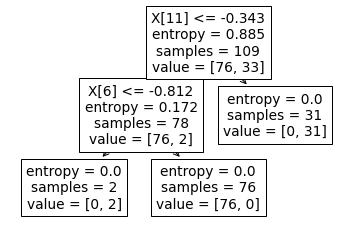

In [ ]:
# Split Data
df, X_std, y = data_preprocessing(features=['pc', 'rbc','htn','cad','ane', 'su',
                                            'sg','age','bp','bgr','bu','sc',
                                            'sod','pot','hemo','pcv'],
                                  remove_NA=True)
train_data, test_data, train_labels, test_labels = train_test_split(X_std, y, test_size=0.2,
                                                  random_state=1, stratify=y)
X_train, X_dev, X_train_labels, X_dev_labels = train_test_split(train_data, train_labels, test_size=0.2,
                                                  random_state=1, stratify=train_labels) 

# Decision Tree
# Train a decision tree classifier.
dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=10, max_depth=6)
dt.fit(X_train, X_train_labels)
tree.plot_tree(dt);

print('Features:', features)
print ('Feature importances:', dt.feature_importances_)

In [ ]:
# Predict on dev data
print('Dev: ')
dev_pred = dt.predict(X_dev)
print(classification_report(dev_pred, X_dev_labels))

# Predict on test data
print('Test: ')
pred = dt.predict(test_data)
print(classification_report(pred, test_labels))
print('Prediction accuracy: %3.2f' % dt.score(test_data, test_labels))

Dev: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00         9

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28

Test: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        11

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35

Prediction accuracy: 1.00


In [ ]:
# Change max_depth
depths = np.append(np.arange(1, 11, 1), [None])
for d in depths:
  # Train a decision tree classifier.
  dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=10, max_depth=d)
  dt.fit(X_train, X_train_labels)

  # Performance
  # Get Predictions
  y_train_pred = dt.predict(X_train)
  y_test_pred = dt.predict(test_data)
  y_dev_pred = dt.predict(X_dev)

  dt_train = accuracy_score(X_train_labels, y_train_pred) 
  dt_dev = accuracy_score(X_dev_labels, y_dev_pred) 
  dt_test = accuracy_score(test_labels, y_test_pred)
  if d == None:
    print('Decision Tree train/dev/test accuracies %.3f/%.3f/%.3f at max_depth = None'
          % (dt_train, dt_dev, dt_test))
  else:
    print('Decision Tree train/dev/test accuracies %.3f/%.3f/%.3f at max_depth = %d'
          % (dt_train, dt_dev, dt_test, d))

Decision Tree train/dev/test accuracies 0.982/1.000/1.000 at max_depth = 1
Decision Tree train/dev/test accuracies 1.000/1.000/1.000 at max_depth = 2
Decision Tree train/dev/test accuracies 1.000/1.000/0.971 at max_depth = 3
Decision Tree train/dev/test accuracies 1.000/1.000/1.000 at max_depth = 4
Decision Tree train/dev/test accuracies 1.000/1.000/0.971 at max_depth = 5
Decision Tree train/dev/test accuracies 1.000/1.000/0.971 at max_depth = 6
Decision Tree train/dev/test accuracies 1.000/1.000/1.000 at max_depth = 7
Decision Tree train/dev/test accuracies 1.000/1.000/1.000 at max_depth = 8
Decision Tree train/dev/test accuracies 1.000/1.000/0.971 at max_depth = 9
Decision Tree train/dev/test accuracies 1.000/1.000/1.000 at max_depth = 10
Decision Tree train/dev/test accuracies 1.000/1.000/1.000 at max_depth = None


In [ ]:
def dt_reg_func(impute_var=False, num_features = 24):
  """ Function takes in boolean impute_var (indicates whether to impute or not) 
  and num_features (indicates number of features to train on) and trains a 
  Decision Tree Classifier and prints dev & test accuracy
  """
  # Select features based on num_features
  if num_features == 2:
    feats = ['bp','sc']
  elif num_features == 16:
    feats = ['pc', 'rbc','htn','cad','ane', 'su','sg','age','bp','bgr','bu','sc','sod','pot','hemo','pcv']
  else:
    feats = ['appet','pc', 'rbc','htn','dm','cad','pe','ane','pcc','ba',
    'al', 'su','sg','age','bp','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']
  
  # Preprocess & Split Data
  df, X_std, y = data_preprocessing(features=feats,remove_NA=True,impute=impute_var)
  train_data, test_data, train_labels, test_labels = train_test_split(X_std, y, test_size=0.2,
                                                    random_state=1, stratify=y)
  X_train, X_dev, X_train_labels, X_dev_labels = train_test_split(train_data, train_labels, test_size=0.2,
                                                    random_state=1, stratify=train_labels) 
  # Create & Fit Instance of Decision Tree Classifier
  dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=10, max_depth=5)
  dt.fit(X_train, X_train_labels)
  # Get Dev Predictions & Accuracy
  prediction = dt.predict(X_dev)
  if impute_var==True:
    print('Prediction Report for Imputed Dataset on Dev Data with ', num_features, ' features')
  else:
    print('Prediction Report for Dataset with No Nulls on Dev Data with ', num_features, ' features')
  print(classification_report(X_dev_labels, prediction))
  # Get Test Predictions & Accuracy
  prediction2 = dt.predict(test_data)
  if impute_var==True:
    print('Prediction Report for Imputed Dataset on Test Data with ', num_features, ' features')
  else:
    print('Prediction Report for Dataset with No Nulls on Test Data with ', num_features, ' features')
  print(classification_report(test_labels, prediction2))

# Get Accuracy for Decision Trees on Regular & Imputed Data with 2 features
dt_reg_func(impute_var=False, num_features=2)
dt_reg_func(impute_var=True, num_features=2)

# Get Accuracy for Decision Trees on Regular & Imputed Data with 16 features
dt_reg_func(impute_var=False, num_features = 16)
dt_reg_func(impute_var=True, num_features = 16)

# Get Accuracy for Decision Trees on Regular & Imputed Data with all features
dt_reg_func(impute_var=False)
dt_reg_func(impute_var=True)

{'ckd': 1, 'notckd': 0}
   id   age    bp     sg   al   su  ...  cad  appet   pe  ane  classification  class
0   0  48.0  80.0  1.020  1.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1
1   1   7.0  50.0  1.020  4.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1
2   2  62.0  80.0  1.010  2.0  3.0  ...  0.0    0.0  0.0  1.0             ckd      1
3   3  48.0  70.0  1.005  4.0  0.0  ...  0.0    0.0  1.0  1.0             ckd      1
4   4  51.0  80.0  1.010  2.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1

[5 rows x 27 columns]
Prediction Report for Dataset with No Nulls on Dev Data with  2  features
              precision    recall  f1-score   support

           0       0.55      0.70      0.62        23
           1       0.77      0.65      0.71        37

    accuracy                           0.67        60
   macro avg       0.66      0.67      0.66        60
weighted avg       0.69      0.67      0.67        60

Prediction Report for Dataset with No Null

[Back to Top](#BacktoTop)
<a id = 'Ensemble'></a>
## Ensemble Learning

<a id = 'Bagging'></a>
## Bagging

In [ ]:
# Train Unpruned Decision Tree
tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=None)

# Bagging
bag = BaggingClassifier(base_estimator=tree,
                        n_estimators=500,
                        n_jobs=1)

# Performance of bagging
# Fit Model & Get Predictions
bag = bag.fit(X_train, X_train_labels)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(test_data)
y_dev_pred = bag.predict(X_dev)

# Get Accuracy
bag_train = accuracy_score(X_train_labels, y_train_pred) 
bag_dev = accuracy_score(X_dev_labels, y_dev_pred) 
bag_test = accuracy_score(test_labels, y_test_pred) 
print('Bagging train/dev/test accuracies %.3f/%.3f/%.3f'
      % (bag_train, bag_dev, bag_test))

Bagging train/dev/test accuracies 1.000/1.000/0.971


In [ ]:
# Vary n_estimators/number of trees
n_trees = [10, 50, 100, 500, 1000, 5000]

# Train Unpruned Decision Tree
tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=None)
for n in n_trees:
  # Bagging
  bag = BaggingClassifier(base_estimator=tree,
                          n_estimators=n,
                          n_jobs=1)

  # Performance of bagging
  # Fit Model & Get Predictions
  bag = bag.fit(X_train, X_train_labels)
  y_train_pred = bag.predict(X_train)
  y_test_pred = bag.predict(test_data)
  y_dev_pred = bag.predict(X_dev)

  # Get Accuracy
  bag_train = accuracy_score(X_train_labels, y_train_pred) 
  bag_dev = accuracy_score(X_dev_labels, y_dev_pred) 
  bag_test = accuracy_score(test_labels, y_test_pred) 
  print('Bagging train/dev/test accuracies %.3f/%.3f/%.3f when n_estimators = %d'
        % (bag_train, bag_dev, bag_test, n))

Bagging train/dev/test accuracies 1.000/1.000/1.000 when n_estimators = 10
Bagging train/dev/test accuracies 1.000/1.000/0.971 when n_estimators = 50
Bagging train/dev/test accuracies 1.000/1.000/0.971 when n_estimators = 100
Bagging train/dev/test accuracies 1.000/1.000/0.971 when n_estimators = 500
Bagging train/dev/test accuracies 1.000/1.000/0.971 when n_estimators = 1000
Bagging train/dev/test accuracies 1.000/1.000/0.971 when n_estimators = 5000


In [ ]:
def bag_reg_func(impute_var=False, num_features = 24):
  """ Function takes in boolean impute_var (indicates whether to impute or not) 
  and num_features (indicates number of features to train on) and trains a 
  Bagging Classifer and prints dev & test accuracy
  """
  # Select features based on num_features
  if num_features == 2:
    feats = ['bp','sc']
  elif num_features == 16:
    feats = ['pc', 'rbc','htn','cad','ane', 'su','sg','age','bp','bgr','bu','sc','sod','pot','hemo','pcv']
  else:
    feats = ['appet','pc', 'rbc','htn','dm','cad','pe','ane','pcc','ba',
    'al', 'su','sg','age','bp','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']
  # Preprocess & Split Data
  df, X_std, y = data_preprocessing(features=feats,remove_NA=True,impute=impute_var)
  train_data, test_data, train_labels, test_labels = train_test_split(X_std, y, test_size=0.2,
                                                    random_state=1, stratify=y)
  X_train, X_dev, X_train_labels, X_dev_labels = train_test_split(train_data, train_labels, test_size=0.2,
                                                    random_state=1, stratify=train_labels) 
  # Create & Fit Instance of Bagging Classifier
  tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=None)
  bag = BaggingClassifier(base_estimator=tree,
                        n_estimators=500,
                        n_jobs=1)
  bag.fit(X_train, X_train_labels)
  # Get Dev Predictions & Accuracy
  prediction = bag.predict(X_dev)
  if impute_var==True:
    print('Prediction Report for Imputed Dataset on Dev Data with ', num_features, ' features')
  else:
    print('Prediction Report for Dataset with No Nulls on Dev Data with ', num_features, ' features')
  print(classification_report(X_dev_labels, prediction))
  # Get Test Predictions & Accuracy
  prediction2 = bag.predict(test_data)
  if impute_var==True:
    print('Prediction Report for Imputed Dataset on Test Data with ', num_features, ' features')
  else:
    print('Prediction Report for Dataset with No Nulls on Test Data with ', num_features, ' features')
  print(classification_report(test_labels, prediction2))


# Get Accuracy for Decision Trees on Regular & Imputed Data with 2 features
bag_reg_func(impute_var=False, num_features=2)
bag_reg_func(impute_var=True, num_features=2)

# Get Accuracy for Decision Trees on Regular & Imputed Data with 16 features
bag_reg_func(impute_var=False, num_features = 16)
bag_reg_func(impute_var=True, num_features = 16)

# Get Accuracy for Decision Trees on Regular & Imputed Data with all features
bag_reg_func(impute_var=False)
bag_reg_func(impute_var=True)

{'ckd': 1, 'notckd': 0}
   id   age    bp     sg   al   su  ...  cad  appet   pe  ane  classification  class
0   0  48.0  80.0  1.020  1.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1
1   1   7.0  50.0  1.020  4.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1
2   2  62.0  80.0  1.010  2.0  3.0  ...  0.0    0.0  0.0  1.0             ckd      1
3   3  48.0  70.0  1.005  4.0  0.0  ...  0.0    0.0  1.0  1.0             ckd      1
4   4  51.0  80.0  1.010  2.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1

[5 rows x 27 columns]
Prediction Report for Dataset with No Nulls on Dev Data with  2  features
              precision    recall  f1-score   support

           0       0.55      0.70      0.62        23
           1       0.77      0.65      0.71        37

    accuracy                           0.67        60
   macro avg       0.66      0.67      0.66        60
weighted avg       0.69      0.67      0.67        60

Prediction Report for Dataset with No Null

[Back to Top](#BacktoTop)
<a id = 'Ada'></a>

## AdaBoost

In [ ]:
# Train a stump decision tree
tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=1)

# AdaBoost for Classification
ada = AdaBoostClassifier(base_estimator=tree,
                         n_estimators=500)

# Performance of AdaBoost
# Fit Model & Get Predictions
ada = ada.fit(X_train, X_train_labels)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(test_data)
y_dev_pred = ada.predict(X_dev)

# Get Accuracy
ada_train = accuracy_score(X_train_labels, y_train_pred) 
ada_dev = accuracy_score(X_dev_labels, y_dev_pred) 
ada_test = accuracy_score(test_labels, y_test_pred) 
print('AdaBoost train/dev/test accuracies %.3f/%.3f/%.3f'
      % (ada_train, ada_dev, ada_test))

AdaBoost train/dev/test accuracies 1.000/1.000/1.000


In [ ]:
# Vary n_estimators/number of trees
n_trees = [10, 50, 100, 500, 1000, 5000]

# Train a stump decision tree
tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=1)
for n in n_trees:
  # AdaBoost for Classification
  ada = AdaBoostClassifier(base_estimator=tree,
                          n_estimators=n)

  # Performance of AdaBoost
  # Fit Model & Get Predictions
  ada = ada.fit(X_train, X_train_labels)
  y_train_pred = ada.predict(X_train)
  y_test_pred = ada.predict(test_data)
  y_dev_pred = ada.predict(X_dev)
  
  # Get Accuracy
  ada_train = accuracy_score(X_train_labels, y_train_pred) 
  ada_dev = accuracy_score(X_dev_labels, y_dev_pred) 
  ada_test = accuracy_score(test_labels, y_test_pred) 
  print('AdaBoost train/dev/test accuracies %.3f/%.3f/%.3f when n_estimators = %d'
        % (ada_train, ada_dev, ada_test, n))

AdaBoost train/dev/test accuracies 1.000/1.000/1.000 when n_estimators = 10
AdaBoost train/dev/test accuracies 1.000/1.000/1.000 when n_estimators = 50
AdaBoost train/dev/test accuracies 1.000/1.000/1.000 when n_estimators = 100
AdaBoost train/dev/test accuracies 1.000/1.000/1.000 when n_estimators = 500
AdaBoost train/dev/test accuracies 1.000/1.000/1.000 when n_estimators = 1000
AdaBoost train/dev/test accuracies 1.000/1.000/1.000 when n_estimators = 5000


In [ ]:
def ada_reg_func(impute_var=False, num_features = 24):
  """ Function takes in boolean impute_var (indicates whether to impute or not) 
  and num_features (indicates number of features to train on) and trains a 
  AdaBoost Classifer and prints dev & test accuracy
  """
  # Select features based on num_features
  if num_features == 2:
    feats = ['bp','sc']
  elif num_features == 16:
    feats = ['pc', 'rbc','htn','cad','ane', 'su','sg','age','bp','bgr','bu','sc','sod','pot','hemo','pcv']
  else:
    feats = ['appet','pc', 'rbc','htn','dm','cad','pe','ane','pcc','ba',
    'al', 'su','sg','age','bp','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']
  # Preprocess & Split Data
  df, X_std, y = data_preprocessing(features=feats,remove_NA=True,impute=impute_var)
  train_data, test_data, train_labels, test_labels = train_test_split(X_std, y, test_size=0.2,
                                                    random_state=1, stratify=y)
  X_train, X_dev, X_train_labels, X_dev_labels = train_test_split(train_data, train_labels, test_size=0.2,
                                                    random_state=1, stratify=train_labels)
  # Create & Fit Instance of AdaBoost Classifier
  tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=1)
  ada = AdaBoostClassifier(base_estimator=tree,
                         n_estimators=100)
  ada.fit(X_train, X_train_labels)
  # Get Dev Predictions & Accuracy
  prediction = ada.predict(X_dev)
  if impute_var==True:
    print('Prediction Report for Imputed Dataset on Dev Data with ', num_features, ' features')
  else:
    print('Prediction Report for Dataset with No Nulls on Dev Data with ', num_features, ' features')
  print(classification_report(X_dev_labels, prediction))
  # Get Test Predictions & Accuracy
  prediction2 = ada.predict(test_data)
  if impute_var==True:
    print('Prediction Report for Imputed Dataset on Test Data with ', num_features, ' features')
  else:
    print('Prediction Report for Dataset with No Nulls on Test Data with ', num_features, ' features')
  print(classification_report(test_labels, prediction2))



# Get Accuracy on Regular & Imputed Data with 2 features
ada_reg_func(impute_var=False, num_features=2)
ada_reg_func(impute_var=True, num_features=2)

# Get Accuracy on Regular & Imputed Data with 16 features
ada_reg_func(impute_var=False, num_features = 16)
ada_reg_func(impute_var=True, num_features = 16)

# Get Accuracy on Regular & Imputed Data with all features
ada_reg_func(impute_var=False)
ada_reg_func(impute_var=True)

{'ckd': 1, 'notckd': 0}
   id   age    bp     sg   al   su  ...  cad  appet   pe  ane  classification  class
0   0  48.0  80.0  1.020  1.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1
1   1   7.0  50.0  1.020  4.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1
2   2  62.0  80.0  1.010  2.0  3.0  ...  0.0    0.0  0.0  1.0             ckd      1
3   3  48.0  70.0  1.005  4.0  0.0  ...  0.0    0.0  1.0  1.0             ckd      1
4   4  51.0  80.0  1.010  2.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1

[5 rows x 27 columns]
Prediction Report for Dataset with No Nulls on Dev Data with  2  features
              precision    recall  f1-score   support

           0       0.55      0.70      0.62        23
           1       0.77      0.65      0.71        37

    accuracy                           0.67        60
   macro avg       0.66      0.67      0.66        60
weighted avg       0.69      0.67      0.67        60

Prediction Report for Dataset with No Null

[Back to Top](#BacktoTop)
<a id = 'RandomForest'></a>

## Random Forest

In [ ]:
# Train Random Forest Classifier
rfc = RandomForestClassifier(criterion='entropy')
rfc.fit(X_train, X_train_labels)

# Get Performance Metrics
# Get Predictions
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(test_data)
y_dev_pred = rfc.predict(X_dev)
# Get Accuracy
rfc_train = accuracy_score(X_train_labels, y_train_pred) 
rfc_dev = accuracy_score(X_dev_labels, y_dev_pred) 
rfc_test = accuracy_score(test_labels, y_test_pred) 
print('RFC train/dev/test accuracies %.3f/%.3f/%.3f'
      % (rfc_train, rfc_dev, rfc_test))

print('Prediction accuracy: %3.2f' % rfc.score(test_data, test_labels))

RFC train/dev/test accuracies 1.000/1.000/1.000
Prediction accuracy: 1.00


In [ ]:
def rf_reg_func(impute_var=False, num_features = 24):
  """ Function takes in boolean impute_var (indicates whether to impute or not) 
  and num_features (indicates number of features to train on) and trains a 
  Random Forest Classifer and prints dev & test accuracy
  """
  # Select features based on num_features
  if num_features == 2:
    feats = ['bp','sc']
  elif num_features == 16:
    feats = ['pc', 'rbc','htn','cad','ane', 'su','sg','age','bp','bgr','bu','sc','sod','pot','hemo','pcv']
  else:
    feats = ['appet','pc', 'rbc','htn','dm','cad','pe','ane','pcc','ba',
    'al', 'su','sg','age','bp','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc']
  # Preprocess & Split Data
  df, X_std, y = data_preprocessing(features=feats,remove_NA=True,impute=impute_var)
  train_data, test_data, train_labels, test_labels = train_test_split(X_std, y, test_size=0.2,
                                                    random_state=1, stratify=y)
  X_train, X_dev, X_train_labels, X_dev_labels = train_test_split(train_data, train_labels, test_size=0.2,
                                                    random_state=1, stratify=train_labels) 
  # Create & Fit Instance of Random Forest Classifier
  rfc = RandomForestClassifier(criterion='entropy')
  rfc.fit(X_train, X_train_labels)
  # Get Dev Predictions & Accuracy
  prediction = rfc.predict(X_dev)
  if impute_var==True:
    print('Prediction Report for Imputed Dataset on Dev Data with ', num_features, ' features')
  else:
    print('Prediction Report for Dataset with No Nulls on Dev Data with ', num_features, ' features')
  print(classification_report(X_dev_labels, prediction))
  # Get Test Predictions & Accuracy
  prediction2 = rfc.predict(test_data)
  if impute_var==True:
    print('Prediction Report for Imputed Dataset on Test Data with ', num_features, ' features')
  else:
    print('Prediction Report for Dataset with No Nulls on Test Data with ', num_features, ' features')
  print(classification_report(test_labels, prediction2))



# Get Accuracy on Regular & Imputed Data with 2 features
rf_reg_func(impute_var=False, num_features=2)
rf_reg_func(impute_var=True, num_features=2)

# Get Accuracy on Regular & Imputed Data with 16 features
rf_reg_func(impute_var=False, num_features = 16)
rf_reg_func(impute_var=True, num_features = 16)

# Get Accuracy on Regular & Imputed Data with all features
rf_reg_func(impute_var=False)
rf_reg_func(impute_var=True)

{'ckd': 1, 'notckd': 0}
   id   age    bp     sg   al   su  ...  cad  appet   pe  ane  classification  class
0   0  48.0  80.0  1.020  1.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1
1   1   7.0  50.0  1.020  4.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1
2   2  62.0  80.0  1.010  2.0  3.0  ...  0.0    0.0  0.0  1.0             ckd      1
3   3  48.0  70.0  1.005  4.0  0.0  ...  0.0    0.0  1.0  1.0             ckd      1
4   4  51.0  80.0  1.010  2.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1

[5 rows x 27 columns]
Prediction Report for Dataset with No Nulls on Dev Data with  2  features
              precision    recall  f1-score   support

           0       0.55      0.70      0.62        23
           1       0.77      0.65      0.71        37

    accuracy                           0.67        60
   macro avg       0.66      0.67      0.66        60
weighted avg       0.69      0.67      0.67        60

Prediction Report for Dataset with No Null

[Back to Top](#BacktoTop)
<a id = 'KNN'></a>

## K-Nearest Neighbors

In [ ]:
def knn_func (feature_set=['pc', 'rbc','htn','cad','ane',
     'su','sg','age','bp','bgr','bu','sc','sod','pot','hemo','pcv'], impute_var=False):
  '''
  function reads in data, cleans data, splits in to train, dev tests, does grid
  search, fits best model, predicts outcomes for dev and test, reports accuracy


 ''' 
  #process and split data
  df, X_std, y = data_preprocessing(features=feature_set,remove_NA=True,impute=impute_var)
  train_data, test_data, train_labels, test_labels = train_test_split(X_std, y, test_size=0.2,
                                                    random_state=1, stratify=y)
  X_train, X_dev, X_train_labels, X_dev_labels = train_test_split(train_data, train_labels, test_size=0.2,
                                                    random_state=1, stratify=train_labels) 
  #grid search hypertune 
  neighbors = {'n_neighbors': list(range(1,50))}
  parameters = neighbors
  knn = KNeighborsClassifier()
  clf = GridSearchCV(knn, parameters, scoring='f1_macro')
  clf.fit(X_train, X_train_labels)
  print("The best k is: "+ str(clf.best_params_))

  #fit optimal parameters
  knn_optimal = KNeighborsClassifier(n_neighbors=clf.best_params_.get('n_neighbors'))
  knn_optimal.fit( X_train, X_train_labels)
  #predict dev
  prediction = knn_optimal.predict(X_dev)
  if impute_var==True:
    print('Prediction Report for Imputed Dataset on Dev Data for ' + str(len(feature_set))+ ' features')
  else:
    print('Prediction Report for Dataset with No Nulls on Dev Data for ' + str(len(feature_set))+ ' features')
  print(classification_report(X_dev_labels, prediction))
  #predict test
  prediction = knn_optimal.predict(test_data)
  if impute_var==True:
    print('Prediction Report for Imputed Dataset on Test Data for ' + str(len(feature_set))+ ' features')
  else:
    print('Prediction Report for Dataset with No Nulls on Test Data for ' + str(len(feature_set))+ ' features')
  print(classification_report(test_labels, prediction))
  
# #2 var
knn_func (feature_set = ['bp','sc'], impute_var=False)
knn_func (feature_set = ['bp','sc'], impute_var=True)

# #16 var
knn_func (feature_set=['pc', 'rbc','htn','cad','ane',
     'su','sg','age','bp','bgr','bu','sc','sod','pot','hemo','pcv'], impute_var=False)
knn_func (feature_set=['pc', 'rbc','htn','cad','ane',
     'su','sg','age','bp','bgr','bu','sc','sod','pot','hemo','pcv'], impute_var=True)

# # 24 var
knn_func (feature_set=['appet','pc', 'rbc','htn','dm','cad','pe','ane','pcc','ba', 
                       'al', 'su','sg','age','bp','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc'], impute_var=False)
knn_func (feature_set=['appet','pc', 'rbc','htn','dm','cad','pe','ane','pcc','ba', 
                       'al', 'su','sg','age','bp','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc'], impute_var=True)

{'ckd': 1, 'notckd': 0}
   id   age    bp     sg   al   su  ...  cad  appet   pe  ane  classification  class
0   0  48.0  80.0  1.020  1.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1
1   1   7.0  50.0  1.020  4.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1
2   2  62.0  80.0  1.010  2.0  3.0  ...  0.0    0.0  0.0  1.0             ckd      1
3   3  48.0  70.0  1.005  4.0  0.0  ...  0.0    0.0  1.0  1.0             ckd      1
4   4  51.0  80.0  1.010  2.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1

[5 rows x 27 columns]
The best k is: {'n_neighbors': 19}
Prediction Report for Dataset with No Nulls on Dev Data for 2 features
              precision    recall  f1-score   support

           0       0.55      0.70      0.62        23
           1       0.77      0.65      0.71        37

    accuracy                           0.67        60
   macro avg       0.66      0.67      0.66        60
weighted avg       0.69      0.67      0.67        60

Prediction

[Back to Top](#BacktoTop)
<a id = 'Logistic'></a>

## Logistic Regression

In [ ]:
def log_reg_func(feature_set=['pc', 'rbc','htn','cad','ane',
     'su','sg','age','bp','bgr','bu','sc','sod','pot','hemo','pcv'], impute_var=False):
 '''
  function reads in data, cleans data, splits in to train, dev tests, does grid
  search, fits best model, predicts outcomes for dev and test, reports accuracy


 ''' 
  #process and split data
  df, X_std, y = data_preprocessing(features=feature_set,remove_NA=True,impute=impute_var)
  train_data, test_data, train_labels, test_labels = train_test_split(X_std, y, test_size=0.2,
                                                    random_state=1, stratify=y)
  X_train, X_dev, X_train_labels, X_dev_labels = train_test_split(train_data, train_labels, test_size=0.2,
                                                    random_state=1, stratify=train_labels) 
  #grid search hypertune
  cvals=np.arange(0.1,0.5,0.02)
  c = {'C': list(cvals)}
  parameters = c
  logreg = LogisticRegression(penalty='l2')
  clf = GridSearchCV(logreg, parameters, scoring='f1_macro')
  clf.fit(X_train, X_train_labels)
  print("The best C is: "+ str(clf.best_params_))

  #fit with best params
  logreg_optimal= LogisticRegression(penalty='l2',C=clf.best_params_.get('C'))
  logreg_optimal.fit(X_train, X_train_labels)

  #predict dev
  prediction = logreg_optimal.predict(X_dev)
  if impute_var==True:
    print('Prediction Report for Imputed Dataset on Dev Data for ' + str(len(feature_set))+ ' features')
  else:
    print('Prediction Report for Dataset with No Nulls on Dev Data for '+ str(len(feature_set))+ ' features' )
  print(classification_report(X_dev_labels, prediction))
  #predict test
  prediction2 = logreg_optimal.predict(test_data)
  if impute_var==True:
    print('Prediction Report for Imputed Dataset on Test Data for ' + str(len(feature_set))+ ' features')
  else:
    print('Prediction Report for Dataset with No Nulls on Test Data for ' + str(len(feature_set))+ ' features')
  print(classification_report(test_labels, prediction2))



# 2 var
log_reg_func (feature_set = ['bp','sc'], impute_var=False)
log_reg_func (feature_set = ['bp','sc'], impute_var=True)

# #16 var
log_reg_func (feature_set=['pc', 'rbc','htn','cad','ane',
     'su','sg','age','bp','bgr','bu','sc','sod','pot','hemo','pcv'], impute_var=False)
log_reg_func (feature_set=['pc', 'rbc','htn','cad','ane',
     'su','sg','age','bp','bgr','bu','sc','sod','pot','hemo','pcv'], impute_var=True)

# # 24 var
log_reg_func (feature_set=['appet','pc', 'rbc','htn','dm','cad','pe','ane','pcc','ba', 
                       'al', 'su','sg','age','bp','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc'], impute_var=False)
log_reg_func (feature_set=['appet','pc', 'rbc','htn','dm','cad','pe','ane','pcc','ba', 
                       'al', 'su','sg','age','bp','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc'], impute_var=True)

{'ckd': 1, 'notckd': 0}
   id   age    bp     sg   al   su  ...  cad  appet   pe  ane  classification  class
0   0  48.0  80.0  1.020  1.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1
1   1   7.0  50.0  1.020  4.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1
2   2  62.0  80.0  1.010  2.0  3.0  ...  0.0    0.0  0.0  1.0             ckd      1
3   3  48.0  70.0  1.005  4.0  0.0  ...  0.0    0.0  1.0  1.0             ckd      1
4   4  51.0  80.0  1.010  2.0  0.0  ...  0.0    1.0  0.0  0.0             ckd      1

[5 rows x 27 columns]
The best C is: {'C': 0.1}
Prediction Report for Dataset with No Nulls on Dev Data for 2 features
              precision    recall  f1-score   support

           0       0.58      0.30      0.40        23
           1       0.67      0.86      0.75        37

    accuracy                           0.65        60
   macro avg       0.62      0.58      0.58        60
weighted avg       0.63      0.65      0.62        60

Prediction Report f